In [24]:
import pandas as pd
import matplotlib.pyplot as plt


#for mapping
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import geoplot



### Importing data

In [8]:
ec_taxa = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 1)

ec_data = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 2)
ec_data["date"] = pd.to_datetime(ec_data["date"], format ="%Y-%m-%d" )
ec_data["year"] = pd.to_numeric(ec_data["date"].dt.year)

print(ec_taxa.head())
print(ec_data.head())

  cruise_name  station zoo_gear ich_gear      lat      lon       date  \
0      AA8704       42      6B3      6B5  38.7500 -73.7500 1987-04-17   
1      AA8704       43      6B3      6B5  38.9500 -74.1167 1987-04-17   
2      AA8704       44      6B3      6B5  38.9167 -74.5500 1987-04-17   
3      AA8704       45      6B3      6B5  39.1000 -74.3167 1987-04-17   
4      AA8704       46      6B3      6B5  39.2333 -74.4333 1987-04-17   

       time  depth  sfc_temp  ...  botspp_100m3  hipobl_100m3  parden_100m3  \
0  00:45:00     54       NaN  ...           0.0           0.0           0.0   
1  02:50:00     46       NaN  ...           0.0           0.0           0.0   
2  04:35:00     28       NaN  ...           0.0           0.0           0.0   
3  06:05:00     24       NaN  ...           0.0           0.0           0.0   
4  07:00:00     18       NaN  ...           0.0           0.0           0.0   

   pseame_100m3  hippla_100m3  limfer_100m3  glycyn_100m3  scoaqu_100m3  \
0          

['cruise_name', 'station', 'zoo_gear', 'ich_gear', 'lat', 'lon', 'date', 'time', 'depth', 'sfc_temp', 'sfc_salt', 'btm_temp', 'btm_salt', 'volume_1m2', 'ctyp_10m2', 'calfin_10m2', 'pseudo_10m2', 'penilia_10m2', 'tlong_10m2', 'cham_10m2', 'echino_10m2', 'larvaceans_10m2', 'para_10m2', 'gas_10m2', 'acarspp_10m2', 'mlucens_10m2', 'evadnespp_10m2', 'salps_10m2', 'oithspp_10m2', 'cirr_10m2', 'chaeto_10m2', 'hyper_10m2', 'gam_10m2', 'evadnord_10m2', 'calminor_10m2', 'copepoda_10m2', 'clauso_10m2', 'dec_10m2', 'euph_10m2', 'prot_10m2', 'acarlong_10m2', 'euc_10m2', 'pel_10m2', 'poly_10m2', 'podon_10m2', 'fish_10m2', 'bry_10m2', 'fur_10m2', 'calspp_10m2', 'oncaea_10m2', 'cory_10m2', 'ost_10m2', 'tstyl_10m2', 'oithspin_10m2', 'mysids_10m2', 'temspp_10m2', 'tort_10m2', 'paraspp_10m2', 'scyphz_10m2', 'anthz_10m2', 'siph_10m2', 'hydrom_10m2', 'coel_10m2', 'ctenop_10m2', 'euph1_10m2', 'thysin_10m2', 'megan_10m2', 'thysra_10m2', 'thyslo_10m2', 'eupham_10m2', 'euphkr_10m2', 'euphspp_10m2', 'thysgr_10m

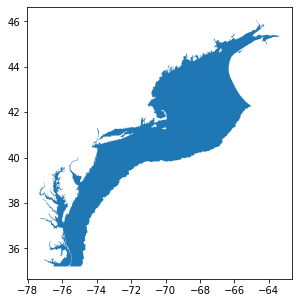

In [15]:
nes = gpd.read_file("/D/MIT-WHOI/data/2021/lme/lme.shp")
fig,ax = plt.subplots(figsize = (5,5))
nes.plot(ax = ax)

geometry = [Point(xy) for xy in zip(ec_data["lon"],ec_data["lat"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(ec_data,crs =crs,geometry =geometry)

geo_df.head()

print(list(geo_df))

In [16]:
#Contextily Providers
ctx.providers.keys()
ctx.providers.Esri.keys()
# ctx.providers.OpenSeaMap.keys()

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas'])

In [17]:
#looking at latitude and longitude
print(nes['lat'].min())
print(nes['lat'].max())
print(nes['lon'].min())
print(nes['lon'].max())

40.96301
40.96301
-70.39637
-70.39637


['cruise_name', 'station', 'zoo_gear', 'ich_gear', 'lat', 'lon', 'date', 'time', 'depth', 'sfc_temp', 'sfc_salt', 'btm_temp', 'btm_salt', 'volume_1m2', 'ctyp_10m2', 'calfin_10m2', 'pseudo_10m2', 'penilia_10m2', 'tlong_10m2', 'cham_10m2', 'echino_10m2', 'larvaceans_10m2', 'para_10m2', 'gas_10m2', 'acarspp_10m2', 'mlucens_10m2', 'evadnespp_10m2', 'salps_10m2', 'oithspp_10m2', 'cirr_10m2', 'chaeto_10m2', 'hyper_10m2', 'gam_10m2', 'evadnord_10m2', 'calminor_10m2', 'copepoda_10m2', 'clauso_10m2', 'dec_10m2', 'euph_10m2', 'prot_10m2', 'acarlong_10m2', 'euc_10m2', 'pel_10m2', 'poly_10m2', 'podon_10m2', 'fish_10m2', 'bry_10m2', 'fur_10m2', 'calspp_10m2', 'oncaea_10m2', 'cory_10m2', 'ost_10m2', 'tstyl_10m2', 'oithspin_10m2', 'mysids_10m2', 'temspp_10m2', 'tort_10m2', 'paraspp_10m2', 'scyphz_10m2', 'anthz_10m2', 'siph_10m2', 'hydrom_10m2', 'coel_10m2', 'ctenop_10m2', 'euph1_10m2', 'thysin_10m2', 'megan_10m2', 'thysra_10m2', 'thyslo_10m2', 'eupham_10m2', 'euphkr_10m2', 'euphspp_10m2', 'thysgr_10m

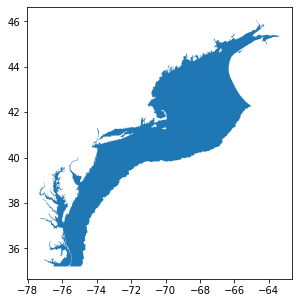

In [103]:
fig,ax = plt.subplots(figsize = (5,5))
nes.plot(ax = ax)

geometry = [Point(xy) for xy in zip(ec_data["lon"],ec_data["lat"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(ec_data,crs =crs,geometry =geometry)

geo_df.head()

print(list(geo_df))

In [127]:
#set date range
start_date = '2000-01-01'
end_date = '2021-01-01'

mask = (geo_df['date'] >= start_date) & (geo_df['date'] <= end_date)

Text(0.5, 1.0, 'Surface Temperature (Deg C)')

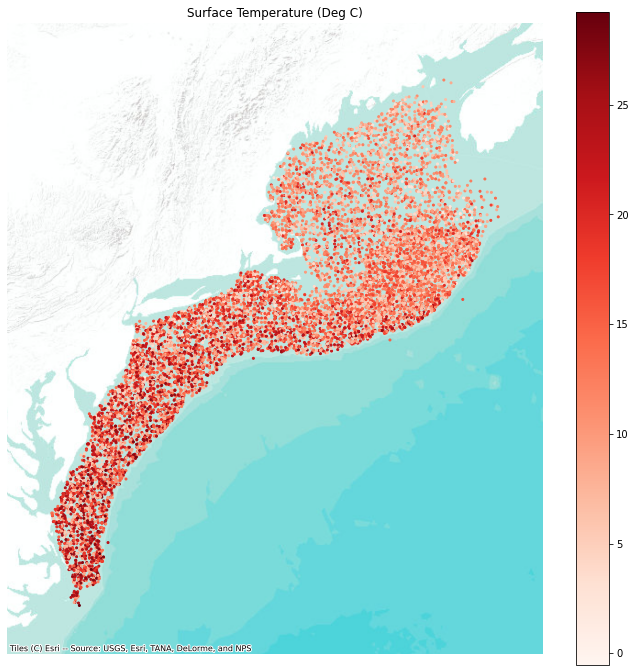

In [128]:
ax = geoplot.webmap(nes,project = geoplot.crs.AlbersEqualArea(),figsize = (12,12))
geoplot.pointplot(geo_df.loc[mask],
                  hue = "sfc_temp",
                  cmap = 'Reds',
                  ax = ax,
                  legend = True,
                 legend_var = 'hue',s = 2)
ctx.add_basemap(ax,source =ctx.providers.Esri.WorldTerrain )
plt.title("Surface Temperature (Deg C)")

Text(0.5, 1.0, 'Calanus Finmarchicus Concentration')

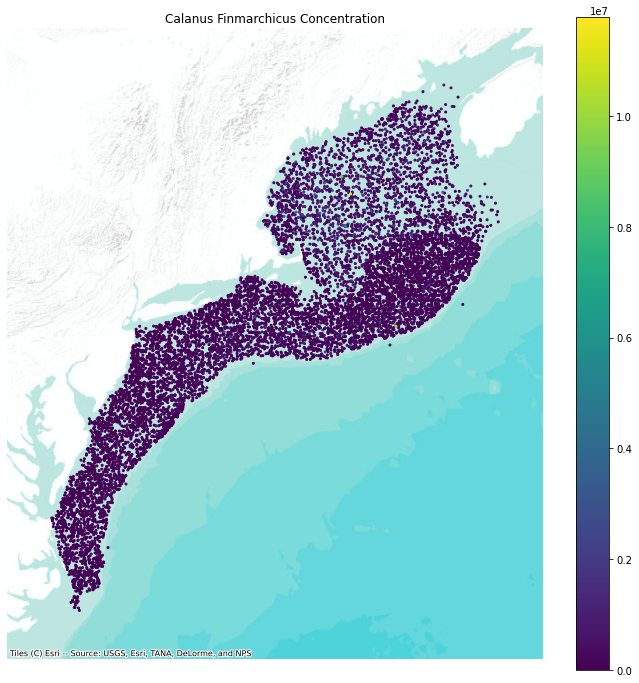

In [129]:
ax = geoplot.webmap(nes,project = geoplot.crs.AlbersEqualArea(),figsize = (12,12))
geoplot.pointplot(geo_df.loc[mask],
                  hue = "calfin_10m2",
                  limits = (0,0.3),
                  cmap = 'viridis',
                  ax = ax,
                  legend = True,
                 legend_var = 'hue',s = 2)
ctx.add_basemap(ax,source =ctx.providers.Esri.WorldTerrain )
plt.title("Calanus Finmarchicus Concentration")